<a href="https://colab.research.google.com/github/glenmiracle18/Glen-s-repo/blob/main/Real_world_problem_revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
import os
import pandas as pd

# set the path to the directory containing the CSV files
directory_path = "/content/combined data"

# initialize an empty DataFrame to store the concatenated data
store = pd.DataFrame()

# iterate over each file in the directory
for filename in os.listdir(directory_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(directory_path, filename)
        
        # read the file into a DataFrame and append it to the all_data DataFrame
        data = pd.read_csv(file_path)
        store = pd.concat([store, data])

# write the concatenated data to a new CSV file
store.to_csv("concatenated_data.csv", index=False)


In [3]:
all_data = pd.read_csv('/content/all_data.csv')
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


Data cleaning

In [4]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how='all')

In [ ]:
#Find 'or' and delete it

In [5]:
temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']
temp_df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
254,254,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
705,705,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1101,1101,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2875,2875,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3708,3708,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [6]:
all_data = all_data[~all_data.apply(lambda x: x.str.contains('Or')).any(axis=1)]

AttributeError: ignored

In [7]:
all_data.shape

(67867, 7)

In [8]:
all_data.dtypes

Unnamed: 0           int64
Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [9]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

ValueError: ignored

In [ ]:
#let us add change the data types

In [ ]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)

In [ ]:
all_data['Price Each'] = all_data['Price Each'].astype(float)

In [ ]:
#now lets create a new sales column
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [ ]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


In [ ]:
monthly_sales = all_data.groupby(all_data['Month']).sum('Sales')
monthly_sales

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


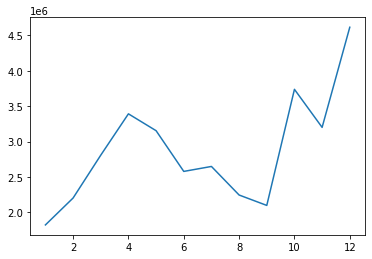

In [ ]:
plt.plot(monthly_sales['Sales'])
plt.show()

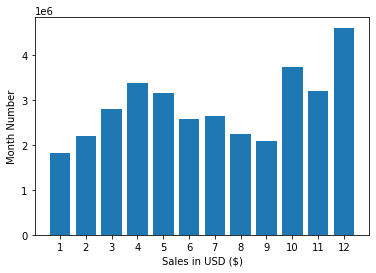

In [ ]:
months = range(1, 13)
plt.bar(months, monthly_sales['Sales'])
plt.xticks(months)
plt.xlabel('Sales in USD ($)')
plt.ylabel('Month Number')
plt.show()

##Q2: what us city had the highest sales

In [ ]:
#add a city column
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.0,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.0
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.0


In [ ]:
city = all_data['Purchase Address'].str.split(',').str[1].str.strip() 
state = all_data['Purchase Address'].str.split(',').str[2].str.strip().str[0:2]
adress = city + ' ' + state
adress.head()

0    New York City NY
1    New York City NY
2    New York City NY
3    San Francisco CA
4          Atlanta GA
Name: Purchase Address, dtype: object

In [ ]:
all_data['City'] = adress

In [ ]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City NY
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA


In [ ]:
all_data.groupby(all_data['City']).sum('Sales')

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta GA,16602,2779908.20,104794,2795498.58
Austin TX,11153,1809873.61,69829,1819581.75
Boston MA,22528,3637409.77,141112,3661642.01
Dallas TX,16730,2752627.82,104620,2767975.40
Los Angeles CA,33289,5421435.23,208325,5452570.80
New York City NY,27932,4635370.83,175741,4664317.43
Portland ME,2750,447189.25,17144,449758.27
Portland OR,11303,1860558.22,70621,1870732.34
San Francisco CA,50239,8211461.74,315520,8262203.91


We see that the city with the highest sale is San Francisco. We also see how we have differentiated between the two portlands